# Logistic Lab

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import fmin_tnc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline

In [69]:
blood = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")

blood.columns = ["Recency", "Frequency", "Monetary", "Time", "Donated_Blood"]
fun.columns = ["Recency", "Frequency", "Monetary", "Time", "Donated_Blood"]

blood = blood.drop(["Monetary","Time"], axis = 1)

X = blood.drop(["Donated_Blood"], axis = 1)
y = blood.Donated_Blood

blood.head()

,Recency,Frequency,Donated_Blood
0,2,50,1
1,0,13,1
2,1,16,1
3,2,20,1
4,1,24,0


This data set that I was able to find is the blood transfusion data set found from the UCI Machine Learning Website. In this data set there was originally a data set that was 5 attributes and 748 instances. The five different instances in this case, but in order to see the logistic model visually I dropped 2 attributes to the data set. The attributes that remained in the model is the Recency attribute that gives us a value of the total months since the last donation and the Frequency attribute which gives us the total number of donations. There is also the Donated_Blood attribute which is what we are trying to predict, which is a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

## Splitting Data Set

In [70]:
#split to 30% test set and 70% training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#split to 20% test set and to 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .66)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((523, 2), (76, 2), (149, 2), (523,), (76,), (149,))

## Logistic Model using Sklearn

In [71]:
logisticRegr = LogisticRegression()
model = logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)

print("Accuracy score:","%",score*100)

Accuracy score: % 75.0


## Confusion Matrix

In [72]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[54,  1],
       [18,  3]])

Text(0.5,15,'Predicted label')

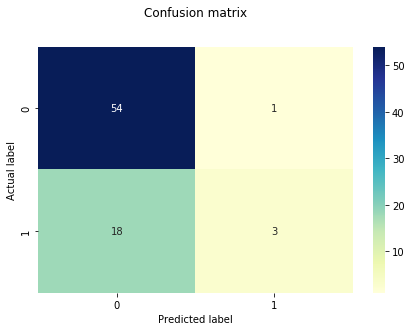

In [73]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Describing Parameters

In [74]:
print("theta0 = ", logisticRegr.intercept_)
print("theta1 and theta2 = ",logisticRegr.coef_)

theta0 =  [-0.86763992]
theta1 and theta2 =  [[-0.1186874   0.08815733]]


$\theta_0 = -0.8676$
$\theta_1 = -0.1186$
$\theta_2 = 0.0881$

The value of the theta0 is -.8676 which basically is the bias that affects the outcome. The theta1 is valued at -.1186 and my theta2 is .0881 and in the case for logistic regression these theta values are used to plug into the sigmond function to help come out with a value to help make your predictions. You can think of these values as the weights just like we did in linear regression. The value for theta1 corresponds to the Recency variable and the value for theta2 corresponds to the Frequency variable. 

## Extra Credit

Reading over the article on Minimizing the Negative Likelihood, in English shows a deeper understanding to more algorithmns instead of just understanding how to do it in scikit learn. This post went over three different models (Linear, Logistic, Softmax Regression) and explained what is really going on, when using them. This article focused a lot of the mathematics behind each method, and what the meaning and goal is behind the mathematics. For example, for linear regression minimizing the negative log-likelihood of our data with respect ot theta is equal to minimizing the MSE between the observed y and our prediction. 

## Statement of Collaboration

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.LogisticRegression.html

When completing this project, I worked with Ryan, Tucker, and Matt
